CUSTOMER DATA OVERVIEW:
Total customers: 200
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   customer_id   200 non-null    object
 1   name          200 non-null    object
 2   risk_segment  200 non-null    object
 3   nationality   200 non-null    object
 4   is_business   200 non-null    int64 
dtypes: int64(1), object(4)
memory usage: 7.9+ KB
None

Sample of customer data:
  customer_id        name risk_segment nationality  is_business
0    CUST0000  Customer_0          low     Rwandan            0
1    CUST0001  Customer_1         high     Rwandan            0
2    CUST0002  Customer_2       medium   Tanzanian            0
3    CUST0003  Customer_3          low      Kenyan            0
4    CUST0004  Customer_4          low     Rwandan            0

TRANSACTION DATA OVERVIEW:
Total transactions: 2000
<class 'pandas.core.frame.DataFrame'>
R

findfont: Font family ['cmsy10'] not found. Falling back to DejaVu Sans.
findfont: Font family ['cmr10'] not found. Falling back to DejaVu Sans.
findfont: Font family ['cmtt10'] not found. Falling back to DejaVu Sans.
findfont: Font family ['cmmi10'] not found. Falling back to DejaVu Sans.
findfont: Font family ['cmb10'] not found. Falling back to DejaVu Sans.
findfont: Font family ['cmss10'] not found. Falling back to DejaVu Sans.
findfont: Font family ['cmex10'] not found. Falling back to DejaVu Sans.


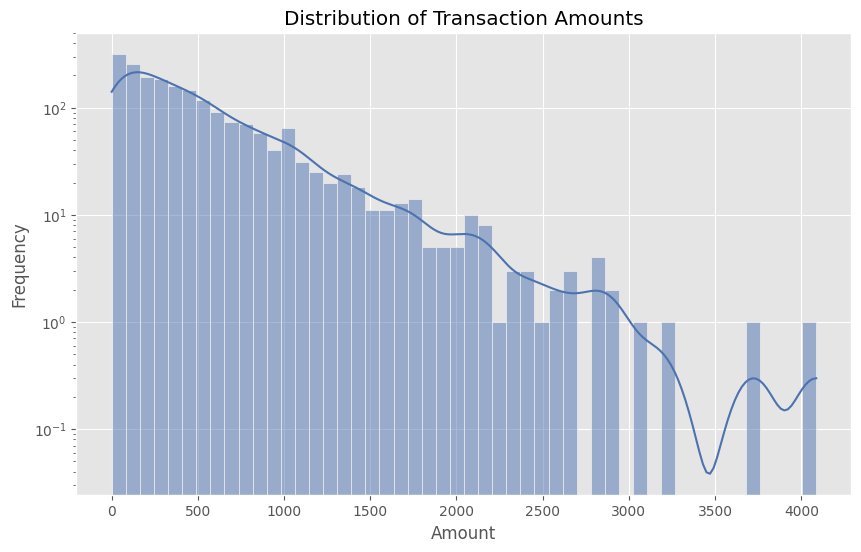

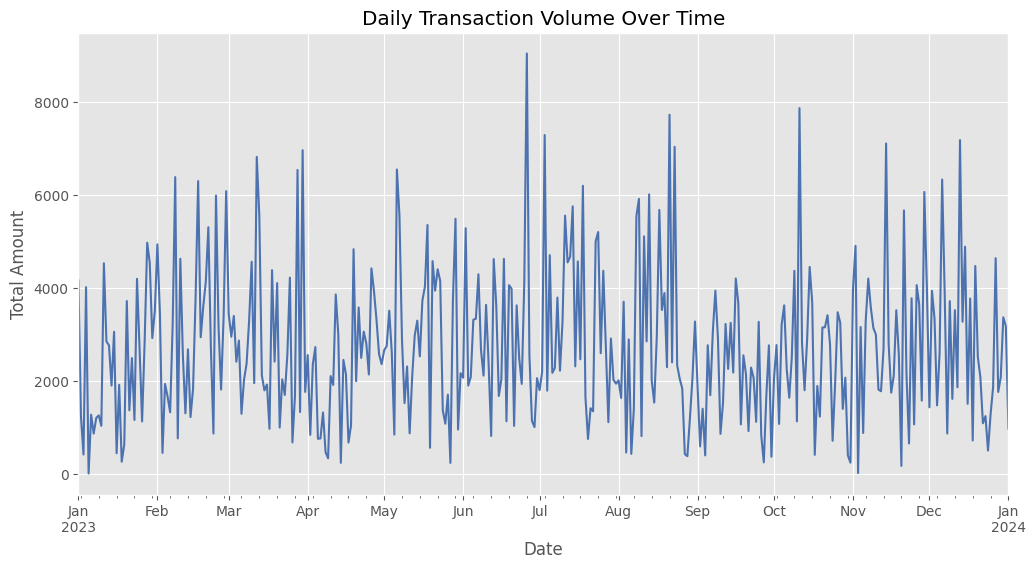

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import matplotlib.dates as mdates
from pyvis.network import Network
import warnings
warnings.filterwarnings('ignore')

# Set visualization style
plt.style.use('ggplot')
sns.set_palette('deep')
plt.rcParams['figure.figsize'] = (12, 8)

# Load the datasets
customers_df = pd.read_csv('Question4customers.csv')
transactions_df = pd.read_csv('Question4transactions.csv')

# Display basic information about the datasets
print("CUSTOMER DATA OVERVIEW:")
print(f"Total customers: {len(customers_df)}")
print(customers_df.info())
print("\nSample of customer data:")
print(customers_df.head())

print("\nTRANSACTION DATA OVERVIEW:")
print(f"Total transactions: {len(transactions_df)}")
print(transactions_df.info())
print("\nSample of transaction data:")
print(transactions_df.head())

# Check for missing values
print("\nMissing values in customer data:")
print(customers_df.isnull().sum())
print("\nMissing values in transaction data:")
print(transactions_df.isnull().sum())

# Explore customer data distributions
print("\nRisk segment distribution:")
print(customers_df['risk_segment'].value_counts())

print("\nNationality distribution (top 10):")
print(customers_df['nationality'].value_counts().head(10))

print("\nBusiness vs Individual accounts:")
print(customers_df['is_business'].value_counts())

# Convert timestamp to datetime for transaction analysis
transactions_df['timestamp'] = pd.to_datetime(transactions_df['timestamp'])

# Transaction timeline
print("\nTransaction timeline:")
print(f"First transaction: {transactions_df['timestamp'].min()}")
print(f"Last transaction: {transactions_df['timestamp'].max()}")
print(f"Total time span: {transactions_df['timestamp'].max() - transactions_df['timestamp'].min()}")

# Transaction amount statistics
print("\nTransaction amount statistics:")
print(transactions_df['amount'].describe())

# Plot transaction amount distribution
plt.figure(figsize=(10, 6))
sns.histplot(transactions_df['amount'], bins=50, kde=True)
plt.title('Distribution of Transaction Amounts')
plt.xlabel('Amount')
plt.ylabel('Frequency')
plt.yscale('log')  # Log scale for better visualization
plt.show()

# Plot transaction timeline
plt.figure(figsize=(12, 6))
transactions_df.set_index('timestamp')['amount'].resample('D').sum().plot()
plt.title('Daily Transaction Volume Over Time')
plt.xlabel('Date')
plt.ylabel('Total Amount')
plt.show()

Network created with 200 nodes and 1953 edges
Network density: 0.049070
Is the network strongly connected? True
Number of self-loops (accounts transacting with themselves): 0

In-degree statistics:
  Min: 3, Max: 19, Mean: 9.77, Median: 10.0
Out-degree statistics:
  Min: 4, Max: 17, Mean: 9.77, Median: 10.0


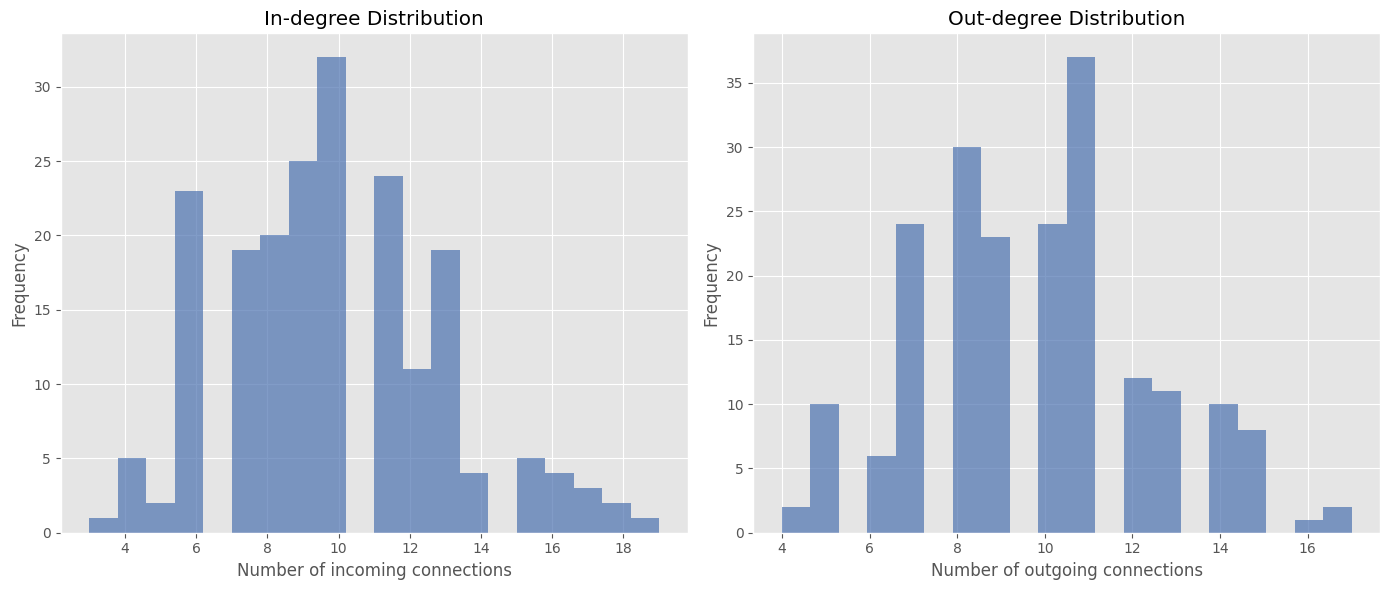

In [2]:
# Create a directed graph
G = nx.DiGraph()

# Add nodes (customers) with their attributes
for _, customer in customers_df.iterrows():
    G.add_node(customer['customer_id'], 
               name=customer['name'],
               risk_segment=customer['risk_segment'],
               nationality=customer['nationality'],
               is_business=customer['is_business'])

# Add edges (transactions)
for _, tx in transactions_df.iterrows():
    # If the edge already exists, increment weight
    if G.has_edge(tx['sender_id'], tx['receiver_id']):
        # Add to weight (transaction amount)
        G[tx['sender_id']][tx['receiver_id']]['weight'] += tx['amount']
        # Increment transaction count
        G[tx['sender_id']][tx['receiver_id']]['count'] += 1
        # Track timestamps as a list
        G[tx['sender_id']][tx['receiver_id']]['timestamps'].append(tx['timestamp'])
    else:
        # Create new edge with initial values
        G.add_edge(tx['sender_id'], tx['receiver_id'], 
                   weight=tx['amount'],  # Sum of transaction amounts
                   count=1,  # Number of transactions
                   timestamps=[tx['timestamp']])  # List of transaction timestamps

# Display basic network statistics
print(f"Network created with {G.number_of_nodes()} nodes and {G.number_of_edges()} edges")
print(f"Network density: {nx.density(G):.6f}")

# Check if network is strongly connected
is_strongly_connected = nx.is_strongly_connected(G)
print(f"Is the network strongly connected? {is_strongly_connected}")

if not is_strongly_connected:
    # Get the number of strongly connected components
    strongly_connected_components = list(nx.strongly_connected_components(G))
    print(f"Number of strongly connected components: {len(strongly_connected_components)}")
    print(f"Size of largest strongly connected component: {len(max(strongly_connected_components, key=len))}")

# Identify nodes with self-loops (sending money to themselves)
self_loops = list(nx.selfloop_edges(G))
print(f"Number of self-loops (accounts transacting with themselves): {len(self_loops)}")

# Basic degree statistics
in_degrees = [d for n, d in G.in_degree()]
out_degrees = [d for n, d in G.out_degree()]

print(f"\nIn-degree statistics:")
print(f"  Min: {min(in_degrees)}, Max: {max(in_degrees)}, Mean: {np.mean(in_degrees):.2f}, Median: {np.median(in_degrees)}")
print(f"Out-degree statistics:")
print(f"  Min: {min(out_degrees)}, Max: {max(out_degrees)}, Mean: {np.mean(out_degrees):.2f}, Median: {np.median(out_degrees)}")

# Plot degree distributions
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.hist(in_degrees, bins=20, alpha=0.7)
plt.title('In-degree Distribution')
plt.xlabel('Number of incoming connections')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
plt.hist(out_degrees, bins=20, alpha=0.7)
plt.title('Out-degree Distribution')
plt.xlabel('Number of outgoing connections')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


Calculating centrality measures...

Identifying outliers in centrality measures...
in_degree_centrality: 10 outliers detected (threshold: 0.079630)
out_degree_centrality: 3 outliers detected (threshold: 0.076143)
betweenness_centrality: 11 outliers detected (threshold: 0.070379)
eigenvector_centrality: 11 outliers detected (threshold: 0.126285)
pagerank: 10 outliers detected (threshold: 0.009234)
volume_ratio: 8 outliers detected (threshold: 3.676741)
total_volume: 8 outliers detected (threshold: 15920.702324)

Top 5 outliers by in_degree_centrality:
                  name  in_degree_centrality risk_segment nationality  \
CUST0141  Customer_141              0.095477          low     Ugandan   
CUST0097   Customer_97              0.090452          low     Rwandan   
CUST0165  Customer_165              0.090452       medium     Ugandan   
CUST0011   Customer_11              0.085427         high     Rwandan   
CUST0144  Customer_144              0.085427          low      Kenyan   

    

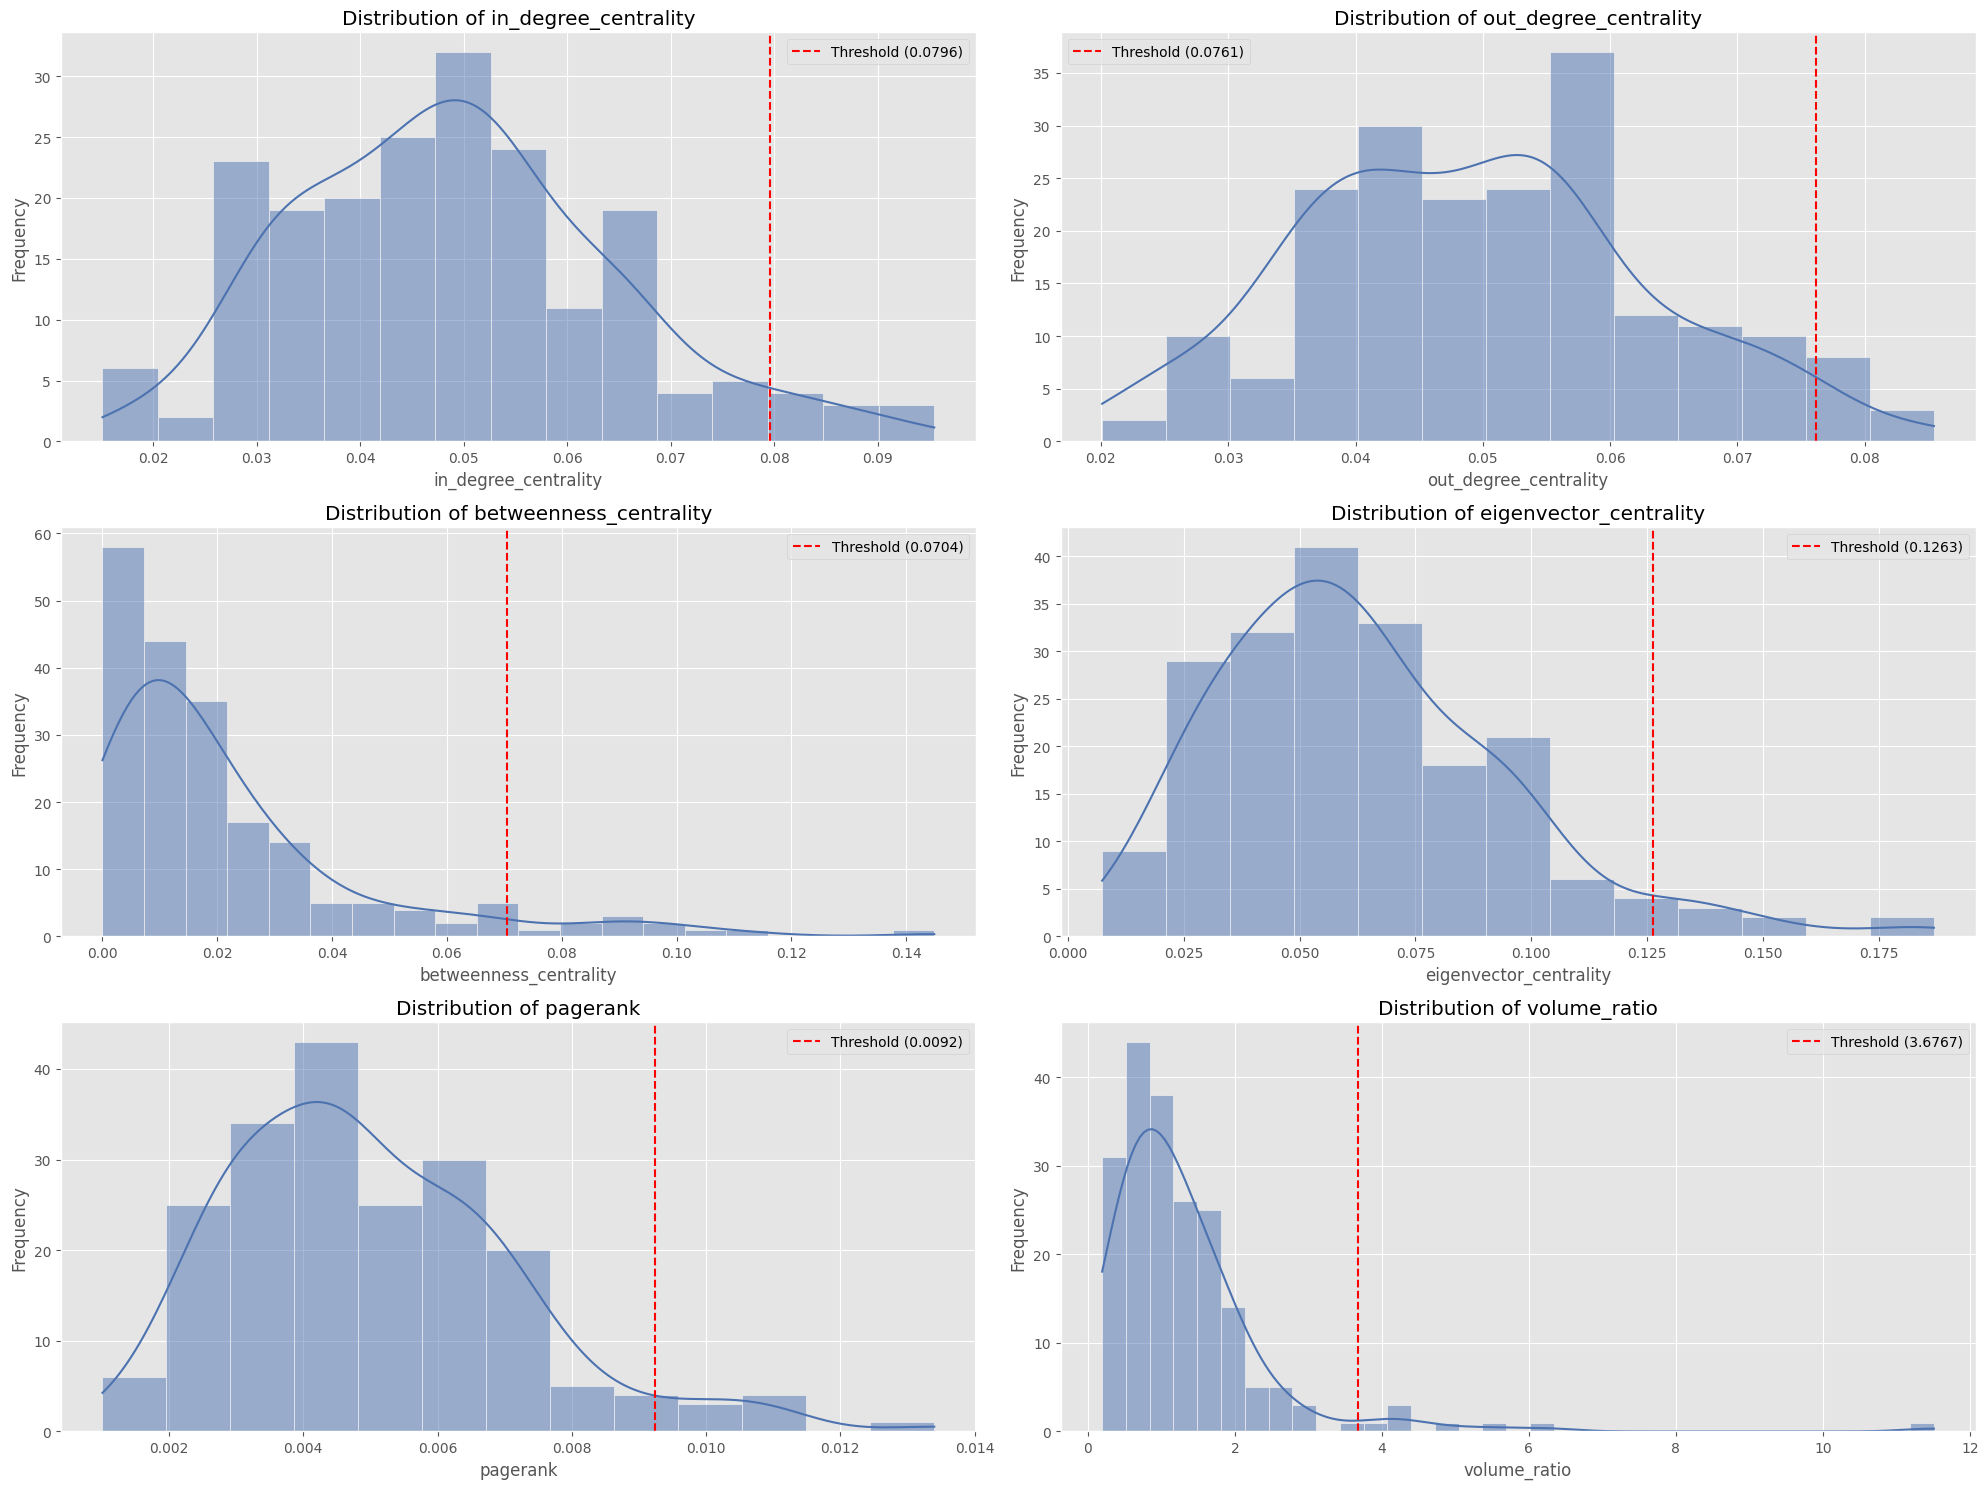

In [3]:
# Calculate centrality measures
print("Calculating centrality measures...")

# 1. Degree Centrality (normalized by maximum possible)
in_degree_centrality = nx.in_degree_centrality(G)
out_degree_centrality = nx.out_degree_centrality(G)

# 2. Betweenness Centrality - identifies bridge nodes that facilitate money flow
betweenness_centrality = nx.betweenness_centrality(G, weight='weight')

# 3. Eigenvector Centrality - identifies nodes connected to other important nodes
try:
    eigenvector_centrality = nx.eigenvector_centrality(G, weight='weight', max_iter=1000)
except:
    print("Eigenvector centrality calculation did not converge. Using numpy implementation.")
    eigenvector_centrality = nx.eigenvector_centrality_numpy(G, weight='weight')

# 4. PageRank - considers both connections and transaction volumes
pagerank = nx.pagerank(G, weight='weight')

# Create a DataFrame to store all centrality measures
centrality_df = pd.DataFrame({
    'in_degree': dict(G.in_degree()),
    'out_degree': dict(G.out_degree()),
    'in_degree_centrality': in_degree_centrality,
    'out_degree_centrality': out_degree_centrality,
    'betweenness_centrality': betweenness_centrality,
    'eigenvector_centrality': eigenvector_centrality,
    'pagerank': pagerank
})

# Add customer metadata
centrality_df = centrality_df.join(customers_df.set_index('customer_id'), how='left')

# Calculate total transaction volumes for each node
in_volumes = {}
out_volumes = {}

for node in G.nodes():
    # Calculate incoming volume
    in_vol = sum(G[u][node]['weight'] for u in G.predecessors(node))
    in_volumes[node] = in_vol
    
    # Calculate outgoing volume
    out_vol = sum(G[node][v]['weight'] for v in G.successors(node))
    out_volumes[node] = out_vol

# Add volume metrics to DataFrame
centrality_df['in_volume'] = pd.Series(in_volumes)
centrality_df['out_volume'] = pd.Series(out_volumes)
centrality_df['total_volume'] = centrality_df['in_volume'] + centrality_df['out_volume']
centrality_df['volume_ratio'] = centrality_df['out_volume'] / centrality_df['in_volume']

# Identify outliers using mean + 2*std threshold
print("\nIdentifying outliers in centrality measures...")
def find_outliers(df, column):
    threshold = df[column].mean() + 2 * df[column].std()
    outliers = df[df[column] > threshold].sort_values(by=column, ascending=False)
    return outliers, threshold

# Find outliers for each centrality measure
outlier_results = {}
for measure in ['in_degree_centrality', 'out_degree_centrality', 'betweenness_centrality', 
                'eigenvector_centrality', 'pagerank', 'volume_ratio', 'total_volume']:
    outliers, threshold = find_outliers(centrality_df, measure)
    outlier_results[measure] = {
        'outliers': outliers,
        'threshold': threshold,
        'count': len(outliers)
    }
    print(f"{measure}: {len(outliers)} outliers detected (threshold: {threshold:.6f})")

# Display top outliers for each measure
for measure, result in outlier_results.items():
    print(f"\nTop 5 outliers by {measure}:")
    outliers_subset = result['outliers'][['name', measure, 'risk_segment', 'nationality', 'is_business']]
    print(outliers_subset.head())

# Plot the distribution of each centrality measure
plt.figure(figsize=(20, 15))
measures = ['in_degree_centrality', 'out_degree_centrality', 'betweenness_centrality', 
           'eigenvector_centrality', 'pagerank', 'volume_ratio']

for i, measure in enumerate(measures):
    plt.subplot(3, 2, i+1)
    sns.histplot(centrality_df[measure], kde=True)
    plt.axvline(outlier_results[measure]['threshold'], color='r', linestyle='--', 
                label=f'Threshold ({outlier_results[measure]["threshold"]:.4f})')
    plt.title(f'Distribution of {measure}')
    plt.xlabel(measure)
    plt.ylabel('Frequency')
    plt.legend()

plt.tight_layout()
plt.show()


In [ ]:
# Create visualization of the transaction network
# Focus on suspicious accounts and communities

from pyvis.network import Network
# Use NetworkX's community detection instead
import networkx.algorithms.community as nx_comm

# Create network visualization function
def create_network_visual(G, centrality_measure, title, filename, show_labels=True, 
                         filter_threshold=None, highlighted_nodes=None):
    """
    Create and save an interactive network visualization
    
    Parameters:
    - G: NetworkX graph
    - centrality_measure: Dictionary of centrality values
    - title: Title for the visualization
    - filename: Output HTML filename
    - show_labels: Whether to show node labels
    - filter_threshold: Optional threshold to filter edges by weight
    - highlighted_nodes: List of nodes to highlight
    """
    # Create a Pyvis network
    net = Network(height="750px", width="100%", notebook=True, directed=True)
    net.heading = title
    
    # Set physics layout
    net.barnes_hut(spring_length=250, spring_strength=0.001, damping=0.09)
    
    # Copy the graph to not modify the original
    if filter_threshold:
        H = nx.DiGraph()
        for u, v, data in G.edges(data=True):
            if data['weight'] > filter_threshold:
                H.add_edge(u, v, **data)
        for node in G.nodes():
            if node in H:
                H.nodes[node].update(G.nodes[node])
    else:
        H = G.copy()
    
    # Detect communities for node coloring
    # Convert to undirected for community detection
    undirected_H = H.to_undirected()
    # Use Louvain community detection from NetworkX
    communities = nx_comm.louvain_communities(undirected_H)
    
    # Create a partition dictionary mapping nodes to community IDs
    partition = {}
    for i, community in enumerate(communities):
        for node in community:
            partition[node] = i
    
    # Add nodes with size based on centrality and color based on community
    for node in H.nodes():
        # Get node attributes
        node_attrs = H.nodes[node]
        
        # Determine node size based on centrality
        size = 10 + 40 * centrality_measure.get(node, 0)
        
        # Create node label
        if show_labels:
            label = f"{node}\n{node_attrs.get('name', '')}"
        else:
            label = node
        
        # Set node color based on community
        community_id = partition.get(node, 0)
        
        # Highlight specific nodes if requested
        if highlighted_nodes and node in highlighted_nodes:
            color = "#ff0000"  # Red for highlighted nodes
            size *= 1.5  # Make highlighted nodes bigger
        else:
            # Use different colors for different communities
            colors = ['#66c2a5', '#fc8d62', '#8da0cb', '#e78ac3', '#a6d854', 
                     '#ffd92f', '#e5c494', '#b3b3b3', '#8dd3c7', '#bebada']
            color = colors[community_id % len(colors)]
        
        # Business vs individual node shape
        if node_attrs.get('is_business', 0) == 1:
            shape = 'square'  # Business accounts as squares
        else:
            shape = 'dot'  # Individual accounts as circles
        
        # Add node to the visualization
        net.add_node(node, label=label, size=size, color=color, 
                    title=f"ID: {node}<br>Name: {node_attrs.get('name', '')}<br>Risk: {node_attrs.get('risk_segment', '')}<br>Nationality: {node_attrs.get('nationality', '')}<br>Business: {'Yes' if node_attrs.get('is_business', 0) == 1 else 'No'}<br>Centrality: {centrality_measure.get(node, 0):.4f}",
                    shape=shape)
    
    # Add edges with width based on transaction weight
    for u, v, data in H.edges(data=True):
        width = 0.1 + 5 * (data['weight'] / 5000)  # Scale edge width
        net.add_edge(u, v, value=data['weight'], 
                    title=f"Amount: {data['weight']:.2f}<br>Count: {data['count']}",
                    width=width)
    
    # Save the visualization
    net.show(filename)
    print(f"Network visualization saved to {filename}")
    
    return net



In [6]:


# 1. Scenario 1: Hidden Influencers (High Eigenvector Centrality)
# These are accounts with high influence in the network

# Get top accounts by eigenvector centrality
top_eigenvector = centrality_df.sort_values('eigenvector_centrality', ascending=False).head(10)
print("\nScenario 1: Hidden Influencers (High Eigenvector Centrality)")
print(top_eigenvector[['name', 'risk_segment', 'nationality', 'is_business', 'eigenvector_centrality']])

# Create visualization for Hidden Influencers
hidden_influencers = top_eigenvector.index.tolist()
create_network_visual(G, eigenvector_centrality, 
                     "Hidden Influencers (High Eigenvector Centrality)", 
                     "hidden_influencers.html",
                     highlighted_nodes=hidden_influencers,
                     filter_threshold=500)  # Filter to show only stronger connections

# 2. Scenario 2: Corporate Tax Evasion (High Betweenness Centrality)
# Focus on business accounts that act as bridges

# Get business accounts with high betweenness
business_bridges = centrality_df[centrality_df['is_business'] == 1].sort_values('betweenness_centrality', ascending=False).head(10)
print("\nScenario 2: Corporate Tax Evasion (High Betweenness Centrality)")
print(business_bridges[['name', 'risk_segment', 'nationality', 'betweenness_centrality']])

# Create visualization for Corporate Bridge Accounts
corporate_bridges = business_bridges.index.tolist()
create_network_visual(G, betweenness_centrality, 
                     "Corporate Tax Evasion (High Betweenness Business Accounts)", 
                     "corporate_bridges.html",
                     highlighted_nodes=corporate_bridges,
                     filter_threshold=300)

# 3. Scenario 3: High-Value Money Transfers (Top Degree Centrality and Volume)
# These are accounts handling large amounts of money with many connections

# Combine volume and degree for scoring
centrality_df['volume_degree_score'] = centrality_df['total_volume'] * centrality_df['in_degree'] * centrality_df['out_degree'] / 1000000
top_volume_accounts = centrality_df.sort_values('volume_degree_score', ascending=False).head(10)
print("\nScenario 3: High-Value Money Transfers")
print(top_volume_accounts[['name', 'risk_segment', 'nationality', 'is_business', 'total_volume', 'in_degree', 'out_degree', 'volume_degree_score']])

# Create visualization for High-Value Transfer Accounts
high_value_accounts = top_volume_accounts.index.tolist()
create_network_visual(G, {node: centrality_df.loc[node, 'volume_degree_score'] for node in centrality_df.index if node in G}, 
                     "High-Value Money Transfers", 
                     "high_value_transfers.html",
                     highlighted_nodes=high_value_accounts,
                     filter_threshold=1000)  # Higher threshold to focus on large transfers

# 4. Scenario 4: Rapid Transactions (Top PageRank with Temporal Pattern)
# Identify accounts with high PageRank that also show burst patterns

# For temporal analysis, we need to process transaction timestamps
# Create a function to detect transaction bursts
def detect_transaction_bursts(G, transactions_df):
    # Group transactions by sender
    sender_txs = {}
    for _, tx in transactions_df.iterrows():
        sender = tx['sender_id']
        if sender not in sender_txs:
            sender_txs[sender] = []
        sender_txs[sender].append({
            'timestamp': pd.to_datetime(tx['timestamp']),
            'amount': tx['amount'],
            'receiver': tx['receiver_id']
        })
    
    # Detect bursts (many transactions in short time)
    burst_scores = {}
    for sender, txs in sender_txs.items():
        if len(txs) < 5:  # Need at least 5 transactions to detect patterns
            continue
            
        # Sort by timestamp
        txs.sort(key=lambda x: x['timestamp'])
        
        # Look for clusters of transactions
        burst_score = 0
        for i in range(len(txs) - 4):  # Look at 5-transaction windows
            window = txs[i:i+5]
            time_span = (window[-1]['timestamp'] - window[0]['timestamp']).total_seconds() / 3600  # hours
            
            if time_span > 0 and time_span < 24:  # If 5+ transactions within 24 hours
                # Calculate burst score as transactions per hour
                window_burst = 5 / time_span if time_span > 0 else 5  # Avoid division by zero
                burst_score = max(burst_score, window_burst)
        
        burst_scores[sender] = burst_score
    
    return burst_scores

# Calculate burst scores
burst_scores = detect_transaction_bursts(G, transactions_df)
centrality_df['burst_score'] = pd.Series(burst_scores)

# Combine PageRank and burst score
centrality_df['pagerank_burst_score'] = centrality_df['pagerank'] * centrality_df['burst_score'].fillna(0)
top_rapid_accounts = centrality_df.sort_values('pagerank_burst_score', ascending=False).head(10)
print("\nScenario 4: Rapid Transactions (PageRank + Burst Activity)")
print(top_rapid_accounts[['name', 'risk_segment', 'nationality', 'is_business', 'pagerank', 'burst_score', 'pagerank_burst_score']])

# Create visualization for Rapid Transaction Accounts
rapid_accounts = top_rapid_accounts.index.tolist()
create_network_visual(G, pagerank, 
                     "Rapid Transactions (PageRank with Burst Patterns)", 
                     "rapid_transactions.html",
                     highlighted_nodes=rapid_accounts)

# Create a comprehensive view of all suspicious accounts
all_suspicious = list(set(hidden_influencers + corporate_bridges + high_value_accounts + rapid_accounts))
create_network_visual(G, {node: 0.05 for node in G.nodes()}, 
                     "All Suspicious Accounts Overview", 
                     "all_suspicious.html",
                     highlighted_nodes=all_suspicious,
                     filter_threshold=200)

# 5. Find Circular Transaction Patterns
# Detect cycles in the graph that might indicate money laundering or tax evasion

# Find all simple cycles in the graph (limited to shorter cycles for computational efficiency)
from itertools import islice

print("\nDetecting circular transaction patterns...")
try:
    # Use simple_cycles to find circular transaction patterns
    # Limit to cycles with 5 or fewer nodes for computational efficiency
    cycles = list(islice(nx.simple_cycles(G), 1000))
    cycles = [c for c in cycles if len(c) <= 5]
    
    # Score cycles based on total transaction volume
    cycle_scores = []
    for cycle in cycles:
        total_volume = 0
        min_volume = float('inf')
        
        # Calculate total and minimum volume in the cycle
        for i in range(len(cycle)):
            u = cycle[i]
            v = cycle[(i+1) % len(cycle)]
            if G.has_edge(u, v):
                volume = G[u][v]['weight']
                total_volume += volume
                min_volume = min(min_volume, volume)
        
        # Score is based on total volume and length of cycle
        # Higher score for cycles with consistent high volumes (min_volume close to average)
        avg_volume = total_volume / len(cycle)
        volume_consistency = min_volume / avg_volume if avg_volume > 0 else 0
        
        cycle_scores.append({
            'cycle': cycle,
            'length': len(cycle),
            'total_volume': total_volume,
            'avg_volume': avg_volume,
            'min_volume': min_volume,
            'volume_consistency': volume_consistency,
            'score': total_volume * volume_consistency  # Score considering both volume and consistency
        })
    
    # Sort cycles by score (highest first)
    cycle_scores.sort(key=lambda x: x['score'], reverse=True)
    
    # Show top cycles
    print(f"Found {len(cycles)} potential circular transaction patterns")
    print("\nTop 5 suspicious circular transaction patterns:")
    for i, cycle_data in enumerate(cycle_scores[:5]):
        cycle = cycle_data['cycle']
        path_str = " → ".join([f"{node}" for node in cycle + [cycle[0]]])
        print(f"Cycle {i+1}: {path_str}")
        print(f"  Length: {cycle_data['length']} nodes")
        print(f"  Total Volume: {cycle_data['total_volume']:.2f}")
        print(f"  Consistency: {cycle_data['volume_consistency']:.2f}")
        print(f"  Score: {cycle_data['score']:.2f}")
    
    # Visualize the top suspicious cycle
    if cycle_scores:
        top_cycle = cycle_scores[0]['cycle']
        # Create a subgraph containing the cycle nodes and edges
        cycle_subgraph = G.subgraph(top_cycle).copy()
        
        # Add the closing edge to complete the cycle visualization
        if G.has_edge(top_cycle[-1], top_cycle[0]):
            cycle_subgraph.add_edge(top_cycle[-1], top_cycle[0], **G[top_cycle[-1]][top_cycle[0]])
        
        # Create visualization of the top suspicious cycle
        create_network_visual(cycle_subgraph, 
                             {node: 0.1 for node in cycle_subgraph.nodes()}, 
                             f"Top Suspicious Circular Transaction Pattern (Total Volume: {cycle_scores[0]['total_volume']:.2f})", 
                             "suspicious_cycle.html")
except Exception as e:
    print(f"Error detecting cycles: {e}")
    print("Proceeding with analysis without cycle detection.")


Scenario 1: Hidden Influencers (High Eigenvector Centrality)
                  name risk_segment nationality  is_business  \
CUST0165  Customer_165       medium     Ugandan            0   
CUST0186  Customer_186       medium     Ugandan            0   
CUST0130  Customer_130          low      Kenyan            0   
CUST0108  Customer_108          low     Rwandan            1   
CUST0011   Customer_11         high     Rwandan            0   
CUST0129  Customer_129          low     Ugandan            0   
CUST0036   Customer_36          low     Rwandan            1   
CUST0012   Customer_12       medium     Ugandan            0   
CUST0141  Customer_141          low     Ugandan            1   
CUST0084   Customer_84          low      Kenyan            0   

          eigenvector_centrality  
CUST0165                0.186953  
CUST0186                0.179419  
CUST0130                0.157336  
CUST0108                0.146577  
CUST0011                0.142486  
CUST0129               

In [7]:
# 1. Scenario 1: Hidden Influencers (High Eigenvector Centrality)
# These are accounts with high influence in the network

# Get top accounts by eigenvector centrality
top_eigenvector = centrality_df.sort_values('eigenvector_centrality', ascending=False).head(10)
print("\nScenario 1: Hidden Influencers (High Eigenvector Centrality)")
print(top_eigenvector[['name', 'risk_segment', 'nationality', 'is_business', 'eigenvector_centrality']])

# Create visualization for Hidden Influencers
hidden_influencers = top_eigenvector.index.tolist()
create_network_visual(G, eigenvector_centrality, 
                     "Hidden Influencers (High Eigenvector Centrality)", 
                     "hidden_influencers.html",
                     highlighted_nodes=hidden_influencers,
                     filter_threshold=500)  # Filter to show only stronger connections

# 2. Scenario 2: Corporate Tax Evasion (High Betweenness Centrality)
# Focus on business accounts that act as bridges

# Get business accounts with high betweenness
business_bridges = centrality_df[centrality_df['is_business'] == 1].sort_values('betweenness_centrality', ascending=False).head(10)
print("\nScenario 2: Corporate Tax Evasion (High Betweenness Centrality)")
print(business_bridges[['name', 'risk_segment', 'nationality', 'betweenness_centrality']])

# Create visualization for Corporate Bridge Accounts
corporate_bridges = business_bridges.index.tolist()
create_network_visual(G, betweenness_centrality, 
                     "Corporate Tax Evasion (High Betweenness Business Accounts)", 
                     "corporate_bridges.html",
                     highlighted_nodes=corporate_bridges,
                     filter_threshold=300)

# 3. Scenario 3: High-Value Money Transfers (Top Degree Centrality and Volume)
# These are accounts handling large amounts of money with many connections

# Combine volume and degree for scoring
centrality_df['volume_degree_score'] = centrality_df['total_volume'] * centrality_df['in_degree'] * centrality_df['out_degree'] / 1000000
top_volume_accounts = centrality_df.sort_values('volume_degree_score', ascending=False).head(10)
print("\nScenario 3: High-Value Money Transfers")
print(top_volume_accounts[['name', 'risk_segment', 'nationality', 'is_business', 'total_volume', 'in_degree', 'out_degree', 'volume_degree_score']])

# Create visualization for High-Value Transfer Accounts
high_value_accounts = top_volume_accounts.index.tolist()
create_network_visual(G, {node: centrality_df.loc[node, 'volume_degree_score'] if node in centrality_df.index else 0 for node in G.nodes()}, 
                     "High-Value Money Transfers", 
                     "high_value_transfers.html",
                     highlighted_nodes=high_value_accounts,
                     filter_threshold=1000)  # Higher threshold to focus on large transfers

# 4. Scenario 4: Rapid Transactions (Top PageRank with Temporal Pattern)
# Identify accounts with high PageRank that also show burst patterns

# For temporal analysis, we need to process transaction timestamps
# Create a function to detect transaction bursts
def detect_transaction_bursts(G, transactions_df):
    # Group transactions by sender
    sender_txs = {}
    for _, tx in transactions_df.iterrows():
        sender = tx['sender_id']
        if sender not in sender_txs:
            sender_txs[sender] = []
        sender_txs[sender].append({
            'timestamp': pd.to_datetime(tx['timestamp']),
            'amount': tx['amount'],
            'receiver': tx['receiver_id']
        })
    
    # Detect bursts (many transactions in short time)
    burst_scores = {}
    for sender, txs in sender_txs.items():
        if len(txs) < 5:  # Need at least 5 transactions to detect patterns
            continue
            
        # Sort by timestamp
        txs.sort(key=lambda x: x['timestamp'])
        
        # Look for clusters of transactions
        burst_score = 0
        for i in range(len(txs) - 4):  # Look at 5-transaction windows
            window = txs[i:i+5]
            time_span = (window[-1]['timestamp'] - window[0]['timestamp']).total_seconds() / 3600  # hours
            
            if time_span > 0 and time_span < 24:  # If 5+ transactions within 24 hours
                # Calculate burst score as transactions per hour
                window_burst = 5 / time_span if time_span > 0 else 5  # Avoid division by zero
                burst_score = max(burst_score, window_burst)
        
        burst_scores[sender] = burst_score
    
    return burst_scores

# Calculate burst scores
burst_scores = detect_transaction_bursts(G, transactions_df)
centrality_df['burst_score'] = pd.Series(burst_scores)

# Combine PageRank and burst score
centrality_df['pagerank_burst_score'] = centrality_df['pagerank'] * centrality_df['burst_score'].fillna(0)
top_rapid_accounts = centrality_df.sort_values('pagerank_burst_score', ascending=False).head(10)
print("\nScenario 4: Rapid Transactions (PageRank + Burst Activity)")
print(top_rapid_accounts[['name', 'risk_segment', 'nationality', 'is_business', 'pagerank', 'burst_score', 'pagerank_burst_score']])

# Create visualization for Rapid Transaction Accounts
rapid_accounts = top_rapid_accounts.index.tolist()
create_network_visual(G, pagerank, 
                     "Rapid Transactions (PageRank with Burst Patterns)", 
                     "rapid_transactions.html",
                     highlighted_nodes=rapid_accounts)

# Create a comprehensive view of all suspicious accounts
all_suspicious = list(set(hidden_influencers + corporate_bridges + high_value_accounts + rapid_accounts))
create_network_visual(G, {node: 0.05 for node in G.nodes()}, 
                     "All Suspicious Accounts Overview", 
                     "all_suspicious.html",
                     highlighted_nodes=all_suspicious,
                     filter_threshold=200)

# 5. Find Circular Transaction Patterns
# Detect cycles in the graph that might indicate money laundering or tax evasion

# Find all simple cycles in the graph (limited to shorter cycles for computational efficiency)
from itertools import islice

print("\nDetecting circular transaction patterns...")
try:
    # Use simple_cycles to find circular transaction patterns
    # Limit to cycles with 5 or fewer nodes for computational efficiency
    cycles = list(islice(nx.simple_cycles(G), 1000))
    cycles = [c for c in cycles if len(c) <= 5]
    
    # Score cycles based on total transaction volume
    cycle_scores = []
    for cycle in cycles:
        total_volume = 0
        min_volume = float('inf')
        
        # Calculate total and minimum volume in the cycle
        for i in range(len(cycle)):
            u = cycle[i]
            v = cycle[(i+1) % len(cycle)]
            if G.has_edge(u, v):
                volume = G[u][v]['weight']
                total_volume += volume
                min_volume = min(min_volume, volume)
        
        # Score is based on total volume and length of cycle
        # Higher score for cycles with consistent high volumes (min_volume close to average)
        avg_volume = total_volume / len(cycle)
        volume_consistency = min_volume / avg_volume if avg_volume > 0 else 0
        
        cycle_scores.append({
            'cycle': cycle,
            'length': len(cycle),
            'total_volume': total_volume,
            'avg_volume': avg_volume,
            'min_volume': min_volume,
            'volume_consistency': volume_consistency,
            'score': total_volume * volume_consistency  # Score considering both volume and consistency
        })
    
    # Sort cycles by score (highest first)
    cycle_scores.sort(key=lambda x: x['score'], reverse=True)
    
    # Show top cycles
    print(f"Found {len(cycles)} potential circular transaction patterns")
    print("\nTop 5 suspicious circular transaction patterns:")
    for i, cycle_data in enumerate(cycle_scores[:5]):
        cycle = cycle_data['cycle']
        path_str = " → ".join([f"{node}" for node in cycle + [cycle[0]]])
        print(f"Cycle {i+1}: {path_str}")
        print(f"  Length: {cycle_data['length']} nodes")
        print(f"  Total Volume: {cycle_data['total_volume']:.2f}")
        print(f"  Consistency: {cycle_data['volume_consistency']:.2f}")
        print(f"  Score: {cycle_data['score']:.2f}")
    
    # Visualize the top suspicious cycle
    if cycle_scores:
        top_cycle = cycle_scores[0]['cycle']
        # Create a subgraph containing the cycle nodes and edges
        cycle_subgraph = G.subgraph(top_cycle).copy()
        
        # Add the closing edge to complete the cycle visualization
        if G.has_edge(top_cycle[-1], top_cycle[0]):
            cycle_subgraph.add_edge(top_cycle[-1], top_cycle[0], **G[top_cycle[-1]][top_cycle[0]])
        
        # Create visualization of the top suspicious cycle
        create_network_visual(cycle_subgraph, 
                             {node: 0.1 for node in cycle_subgraph.nodes()}, 
                             f"Top Suspicious Circular Transaction Pattern (Total Volume: {cycle_scores[0]['total_volume']:.2f})", 
                             "suspicious_cycle.html")
except Exception as e:
    print(f"Error detecting cycles: {e}")
    print("Proceeding with analysis without cycle detection.")

# 6. Create a final DataFrame with all suspicious accounts and reasons
# This provides the deliverable of flagged customer nodes with reasons

def generate_suspicious_reason(row, hidden_influencers, corporate_bridges, high_value_accounts, rapid_accounts, cycle_nodes=None):
    """Generate explanatory text for why an account is flagged"""
    reasons = []
    
    if row.name in hidden_influencers:
        reasons.append(f"Hidden influencer with high network influence (eigenvector: {row['eigenvector_centrality']:.4f})")
    
    if row.name in corporate_bridges and row['is_business'] == 1:
        reasons.append(f"Business acting as network bridge (betweenness: {row['betweenness_centrality']:.4f})")
    
    if row.name in high_value_accounts:
        reasons.append(f"High value transfers (volume: {row['total_volume']:.2f}, connections: in={row['in_degree']}, out={row['out_degree']})")
    
    if row.name in rapid_accounts:
        reasons.append(f"Rapid transaction patterns (PageRank: {row['pagerank']:.4f}, burst score: {row['burst_score']:.1f})")
    
    if cycle_nodes and row.name in cycle_nodes:
        reasons.append("Involved in circular transaction pattern")
    
    if row['volume_ratio'] > 3:
        reasons.append(f"High send-to-receive ratio ({row['volume_ratio']:.2f})")
    
    return "; ".join(reasons)

# Get list of all nodes involved in top cycles
cycle_nodes = set()
for cycle_data in cycle_scores[:3] if 'cycle_scores' in locals() else []:
    cycle_nodes.update(cycle_data['cycle'])

# Create final suspicious accounts DataFrame
all_suspicious_df = centrality_df.loc[all_suspicious].copy()
all_suspicious_df['flag_reasons'] = all_suspicious_df.apply(
    lambda row: generate_suspicious_reason(row, hidden_influencers, corporate_bridges, 
                                          high_value_accounts, rapid_accounts, cycle_nodes), 
    axis=1
)

print("\nFinal list of flagged suspicious accounts:")
print(all_suspicious_df[['name', 'risk_segment', 'nationality', 'is_business', 'flag_reasons']].head(10))

# Save to CSV for further investigation
all_suspicious_df.to_csv('upesi_flagged_accounts.csv')
print("Suspicious accounts saved to 'upesi_flagged_accounts.csv'")


Scenario 1: Hidden Influencers (High Eigenvector Centrality)
                  name risk_segment nationality  is_business  \
CUST0165  Customer_165       medium     Ugandan            0   
CUST0186  Customer_186       medium     Ugandan            0   
CUST0130  Customer_130          low      Kenyan            0   
CUST0108  Customer_108          low     Rwandan            1   
CUST0011   Customer_11         high     Rwandan            0   
CUST0129  Customer_129          low     Ugandan            0   
CUST0036   Customer_36          low     Rwandan            1   
CUST0012   Customer_12       medium     Ugandan            0   
CUST0141  Customer_141          low     Ugandan            1   
CUST0084   Customer_84          low      Kenyan            0   

          eigenvector_centrality  
CUST0165                0.186953  
CUST0186                0.179419  
CUST0130                0.157336  
CUST0108                0.146577  
CUST0011                0.142486  
CUST0129               

In [10]:
# Create a summary of our findings in relation to Upesi's specific concerns
print("\n## ADDRESSING UPESI'S SPECIFIC CONCERNS")

# 1. Sleeper accounts
print("\n1. Sleeper Accounts")
print("-------------------")
# Check if there are accounts with few transactions initially and then sudden bursts
# This requires historical pattern analysis

# Group transactions by month for each account to detect dormant periods followed by activity
def find_sleeper_accounts(transactions_df, min_dormant_months=2, min_active_transactions=5):
    # Convert to datetime and extract month
    tx_df = transactions_df.copy()
    tx_df['timestamp'] = pd.to_datetime(tx_df['timestamp'])
    tx_df['year_month'] = tx_df['timestamp'].dt.to_period('M')
    
    # Get the range of months in the data
    all_months = sorted(tx_df['year_month'].unique())
    
    # Count transactions by sender and month
    monthly_activity = tx_df.groupby(['sender_id', 'year_month']).size().reset_index(name='tx_count')
    
    # Pivot to get months as columns
    activity_matrix = monthly_activity.pivot_table(
        index='sender_id', columns='year_month', values='tx_count', fill_value=0
    )
    
    # Look for patterns of dormancy followed by activity
    sleeper_accounts = []
    
    for account in activity_matrix.index:
        monthly_counts = activity_matrix.loc[account].values
        active_months = [i for i, count in enumerate(monthly_counts) if count > 0]
        
        if len(active_months) < 2:
            continue  # Skip accounts with activity in only one month
        
        for i in range(1, len(active_months)):
            dormant_gap = active_months[i] - active_months[i-1]
            
            # If there was a dormant period followed by activity
            if dormant_gap > min_dormant_months:
                # Check if the activity after dormancy was significant
                total_after = sum(monthly_counts[active_months[i]:])
                
                if total_after >= min_active_transactions:
                    sleeper_accounts.append({
                        'account': account,
                        'dormant_months': dormant_gap,
                        'active_after': total_after,
                        'first_active_month': all_months[active_months[0]],
                        'dormant_until': all_months[active_months[i]],
                    })
                    break  # Found a pattern, move to next account
    
    return sleeper_accounts

# Find sleeper accounts
sleeper_accounts = find_sleeper_accounts(transactions_df, min_dormant_months=2, min_active_transactions=5)

if sleeper_accounts:
    print(f"Identified {len(sleeper_accounts)} potential sleeper accounts")
    sleeper_df = pd.DataFrame(sleeper_accounts)
    
    # Merge with customer info
    sleeper_df = sleeper_df.merge(
        customers_df[['customer_id', 'name', 'risk_segment', 'nationality', 'is_business']], 
        left_on='account', 
        right_on='customer_id',
        how='left'
    )
    
    # Display top sleeper accounts
    print("\nTop 5 sleeper accounts:")
    print(sleeper_df.sort_values('dormant_months', ascending=False).head(5)[
        ['name', 'risk_segment', 'nationality', 'is_business', 'dormant_months', 'active_after']
    ])
else:
    print("No clear sleeper account patterns detected in the data")

# 2. Circular transactions
print("\n2. Circular Transactions")
print("----------------------")
# Look for smaller cycles (3-4 nodes)
try:
    # Find triangles (3-node cycles) and squares (4-node cycles)
    small_cycles = []
    for length in [3, 4]:
        for cycle in nx.simple_cycles(G):
            if len(cycle) == length:
                small_cycles.append(cycle)
                if len(small_cycles) >= 100:  # Limit to 100 small cycles
                    break
        if len(small_cycles) >= 100:
            break
    
    if small_cycles:
        print(f"Found {len(small_cycles)} potential small circular transaction patterns (3-4 nodes)")
        
        # Analyze the circular transactions
        for i, cycle in enumerate(small_cycles[:5]):
            # Get customer info for the cycle
            cycle_info = []
            for node in cycle:
                customer = customers_df[customers_df['customer_id'] == node].iloc[0]
                cycle_info.append({
                    'id': node,
                    'name': customer['name'],
                    'risk': customer['risk_segment'],
                    'nationality': customer['nationality'],
                    'business': customer['is_business']
                })
            
            # Calculate total volume in the cycle
            total_volume = 0
            for i in range(len(cycle)):
                src = cycle[i]
                dst = cycle[(i+1) % len(cycle)]
                if G.has_edge(src, dst):
                    total_volume += G[src][dst]['weight']
            
            # Display cycle information
            print(f"\nCircular Transaction {i+1}: {' → '.join(cycle)} → {cycle[0]}")
            print(f"Total volume: {total_volume:.2f}")
            print("Participants:")
            for info in cycle_info:
                print(f"  - {info['id']} ({info['name']}): {info['risk']} risk, {info['nationality']}, {'Business' if info['business'] == 1 else 'Individual'}")
    else:
        print("No small circular transaction patterns detected")
except Exception as e:
    print(f"Error in cycle detection: {e}")
    print("No clear circular transaction patterns identified")

# 3. Rings or clusters of collusion
print("\n3. Rings or Clusters of Collusion")
print("-------------------------------")
# Use community detection to find potential collusion groups
# We'll look for small, densely connected clusters

# Convert to undirected graph for community detection
undirected_G = G.to_undirected()

# Find communities using Louvain method
communities = list(nx_comm.louvain_communities(undirected_G))

# Sort communities by size (smallest first) and filter for potential collusion rings
potential_rings = []
for i, community in enumerate(sorted(communities, key=len)):
    if 3 <= len(community) <= 8:  # Focus on small to medium sized communities
        # Calculate internal density
        subgraph = undirected_G.subgraph(community)
        density = nx.density(subgraph)
        
        # Calculate transaction volume within community
        internal_volume = 0
        for u, v, data in G.edges(data=True):
            if u in community and v in community:
                internal_volume += data['weight']
        
        # Calculate external volume (money leaving the community)
        external_volume = 0
        for u, v, data in G.edges(data=True):
            if (u in community and v not in community) or (v in community and u not in community):
                external_volume += data['weight']
        
        # Calculate ratio of internal to external volume
        volume_ratio = internal_volume / external_volume if external_volume > 0 else float('inf')
        
        potential_rings.append({
            'community_id': i,
            'size': len(community),
            'members': community,
            'density': density,
            'internal_volume': internal_volume,
            'external_volume': external_volume,
            'volume_ratio': volume_ratio,
            'score': density * volume_ratio  # High density and high internal/external ratio
        })

# Sort by score
potential_rings.sort(key=lambda x: x['score'], reverse=True)

if potential_rings:
    print(f"Identified {len(potential_rings)} potential collusion rings")
    print("\nTop 3 potential collusion rings:")
    for i, ring in enumerate(potential_rings[:3]):
        print(f"\nRing {i+1}:")
        print(f"  Size: {ring['size']} members")
        print(f"  Density: {ring['density']:.2f}")
        print(f"  Internal volume: {ring['internal_volume']:.2f}")
        print(f"  External volume: {ring['external_volume']:.2f}")
        print(f"  Internal/External ratio: {ring['volume_ratio']:.2f}")
        
        # Get member information
        members = []
        for node in ring['members']:
            customer = customers_df[customers_df['customer_id'] == node].iloc[0]
            members.append({
                'id': node,
                'name': customer['name'],
                'risk': customer['risk_segment'],
                'nationality': customer['nationality'],
                'business': customer['is_business']
            })
        
        # Display members
        print("  Members:")
        for member in members:
            print(f"    - {member['id']} ({member['name']}): {member['risk']} risk, {member['nationality']}, {'Business' if member['business'] == 1 else 'Individual'}")
else:
    print("No clear collusion rings detected")

# 4. Invisible intermediaries
print("\n4. Invisible Intermediaries")
print("-------------------------")
# These are accounts with high betweenness but moderate volume/degree
# They act as bridges between different parts of the network

# Calculate metrics for invisible intermediary detection
centrality_df['invisibility_score'] = centrality_df['betweenness_centrality'] / (centrality_df['in_degree'] + centrality_df['out_degree'])

# Get top invisible intermediaries
top_intermediaries = centrality_df.sort_values('invisibility_score', ascending=False).head(10)

print("Top 10 potential invisible intermediaries:")
print(top_intermediaries[['name', 'risk_segment', 'nationality', 'is_business', 
                         'betweenness_centrality', 'in_degree', 'out_degree', 'invisibility_score']])

# 5. Final comprehensive risk score
print("\n5. Final Comprehensive Risk Score")
print("------------------------------")
# Create a comprehensive risk score combining all factors

# Normalize metrics for scoring (0-1 scale)
metrics_to_normalize = ['betweenness_centrality', 'eigenvector_centrality', 'volume_ratio', 
                        'invisibility_score', 'total_volume']

for metric in metrics_to_normalize:
    if metric in centrality_df.columns and centrality_df[metric].max() > 0:
        centrality_df[f'{metric}_norm'] = centrality_df[metric] / centrality_df[metric].max()
    else:
        centrality_df[f'{metric}_norm'] = 0

# Add risk segment as numeric value
risk_map = {'low': 1, 'medium': 2, 'high': 3}
centrality_df['risk_value'] = centrality_df['risk_segment'].map(risk_map)
centrality_df['risk_value_norm'] = centrality_df['risk_value'] / 3  # Normalize to 0-1

# Calculate comprehensive risk score
# Weights can be adjusted based on Upesi's priorities
centrality_df['comprehensive_risk_score'] = (
    0.25 * centrality_df['betweenness_centrality_norm'] +
    0.20 * centrality_df['eigenvector_centrality_norm'] +
    0.15 * centrality_df['volume_ratio_norm'] +
    0.15 * centrality_df['total_volume_norm'] +
    0.15 * centrality_df['invisibility_score_norm'] +
    0.10 * centrality_df['risk_value_norm']
)

# Get top accounts by comprehensive risk score
top_risk_accounts = centrality_df.sort_values('comprehensive_risk_score', ascending=False).head(20)

print("Top 20 highest risk accounts based on comprehensive network analysis:")
print(top_risk_accounts[['name', 'risk_segment', 'nationality', 'is_business', 'comprehensive_risk_score']])

# Save the final risk-ranked accounts to CSV
top_risk_accounts.to_csv('upesi_risk_ranked_accounts.csv')
print("\nFinal risk-ranked accounts saved to 'upesi_risk_ranked_accounts.csv'")


## ADDRESSING UPESI'S SPECIFIC CONCERNS

1. Sleeper Accounts
-------------------
Identified 69 potential sleeper accounts

Top 5 sleeper accounts:
            name risk_segment nationality  is_business  dormant_months  \
63  Customer_176       medium      Kenyan            0               6   
52  Customer_148          low     Ugandan            0               6   
16   Customer_37          low     Rwandan            0               5   
3    Customer_13          low      Kenyan            1               5   
4    Customer_14          low   Tanzanian            0               5   

    active_after  
63           5.0  
52           5.0  
16           5.0  
3            7.0  
4            5.0  

2. Circular Transactions
----------------------


KeyboardInterrupt: 